In [1]:
import numpy as np

## Probability

probability(class) = sigmoid(weights*vectors+bias)

In [10]:
p1 = 0.9
p2 = 0.8
p3 = 0.2

In [11]:
#y_hat of p1,p2,p3
y_hat = [1, 1, 0] #define the classes


In [ ]:
#cross entropy eq
#-yi*ln(Pi)+(1-yi)*ln(1-Pi)

## Cross entropy

In [35]:
# definition: how likely is that the events happen based on the probabilities

# negatives of the logarithms of the probs of the points being their classes

#two models produce the probabilities of each point being correctly 
#classified in a binary siutation. Model A has lower probabilities

prob_modelA = [0.6,0.2,0.1,0.7]
prob_modelB = [0.7,0.9,0.6,0.8]
ln_modelA = np.log(prob_modelA)
ln_modelB = np.log(prob_modelB)

print("Natural log of model A: ")
print(np.log(prob_modelA))

print("Natural log of model B: ")
print(np.log(prob_modelB))


#Cross entropy is the sum of the log probabilities
CrossEntropy_A = np.sum(ln_modelA)
CrossEntropy_B = np.sum(ln_modelB)

print("Cross entropy of model A is {}, cross entropy of model B is {}".format(CrossEntropy_A, CrossEntropy_B))

# Shows that a lower cross entropy relates to a better model 
# and a higher cross entropy means worse model

Natural log of model A: 
[-0.51082562 -1.60943791 -2.30258509 -0.35667494]
Natural log of model B: 
[-0.35667494 -0.10536052 -0.51082562 -0.22314355]
Cross entropy of model A is -4.779523573132869, cross entropy of model B is -1.1960046346767592


In [36]:
# Write a function that takes as input two lists Y, P,
# and returns the float corresponding to their cross-entropy.
def cross_entropy(Y, P):
    Y = np.float_(Y)
    P = np.float_(P)
    return -np.sum(Y * np.log(P) + (1 - Y) * np.log(1 - P))

#example data
Y=[1,0,1,1]
P=[0.4,0.6,0.1,0.5]
cross_entropy(Y,P)

4.828313737302301

## Error function

In [ ]:
y_hat = sigmoid(wx+b)

if y = 1
p(class_1) = y_hat
error1 = -ln(y_hat)

if y = 2
p(class_2) = 1 - p(class_2) = 1 - y_hat
error2 = -ln(1-y_hat)

#summary of both errors
Error = -(1-y)(ln(1-y_hat)) -yln(y_hat)

#works if y = 1 then (1-y) = 0 and cancels the the 

In [25]:
# Binary classification error equation

In [22]:
%%latex 
\[- \frac{1}{m} \sum yi*ln(\widehat{y}) + (1-yi)ln(1-\widehat{y}))\]

<IPython.core.display.Latex object>

In [33]:
%%latex 
\[y\hat{} = \sigma Wx^{i}+b\]

<IPython.core.display.Latex object>

In [ ]:
# multiclass error equation

In [24]:
%%latex 
\[- \frac{1}{m} \sum_{i=1}^{m}\sum_{j=1}^{n} y_{ij} ln(\hat{y_{ij}})\]

<IPython.core.display.Latex object>

## Minimizing error

In [ ]:
# gradient descent on the error function 
#derivative of the sigmoid 

# Closer the label to the pred, smaller the gradient
# Farther the label from pred, larger the grad

# therefore know to move into direction of.  the gradient descent 
# step simply consists in subtracting a multiple of the gradient of the 
# error function at every point, then this updates the weights

#pseudo code

#start with random weights wi....wn
    #for every point for i = 1
        # update weights (alpha *partial derivative of error func w.r.t w_i)
        # new_weight = wi - alpha(part_derivative) w.r.t. weight
                #    = wi - alpha(y_hat - y)xi 
        
        # update bias
        # new_bias = b - alpha(part_derivative) w.r.t. bias
                #  = b - alpha(y_hat - y)

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

### read and plot

In [ ]:
path = "C:/Users/dr_sc/Documents/Intro_deeplearning/1_intro/data.csv"

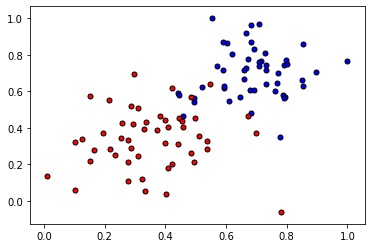

In [42]:
data = pd.read_csv("C:/Users/dr_sc/Documents/Intro_deeplearning/1_intro/data.csv", header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

### implement basic functions

In [43]:
# Implement the following functions
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Output (prediction) formula
def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

    
# Error (log-loss) formula 
# y_hat = output in this example
def error_formula(y, output):
    y = np.float_(y)
    output = np.float_(output)
    return -np.sum(y * np.log(output) - (1 - y) * np.log(1 - output))

# Gradient descent step
# output = w_i
def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    d_error = y - output
    weights += learnrate * d_error * x
    bias += learnrate * d_error
    return weights, bias


### training function

In [44]:
print(sigmoid(2.4))
print(sigmoid(2))
print(sigmoid(1.4))
np.random.seed(44)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

0.9168273035060777
0.8807970779778823
0.8021838885585817



========== Epoch 0 ==========
Train loss:  -0.1635885803963908
Accuracy:  0.4

========== Epoch 10 ==========
Train loss:  17.310780242362412   WARNING - Loss Increasing
Accuracy:  0.59

========== Epoch 20 ==========
Train loss:  14.805218621137747
Accuracy:  0.74

========== Epoch 30 ==========
Train loss:  12.628815990964291
Accuracy:  0.84

========== Epoch 40 ==========
Train loss:  10.957125901546412
Accuracy:  0.86

========== Epoch 50 ==========
Train loss:  9.6516812274257
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  8.612377653826854
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  7.770072757127924
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  7.076380783073391
Accuracy:  0.94

========== Epoch 90 ==========
Train loss:  6.496847649412401
Accuracy:  0.94


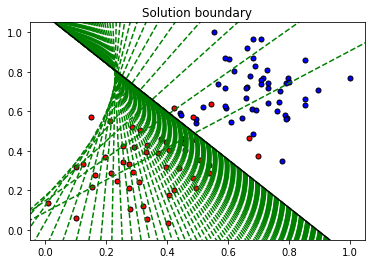

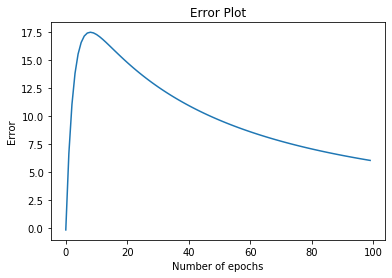

In [45]:
train(X, y, epochs, learnrate, True)

### Perceptron algorithm

In [49]:
#only misclassified points adjust the weights

from sklearn.linear_model import Perceptron

perceptron = Perceptron(alpha = 0.01, max_iter = 100, random_state = 0)
perceptron.fit(X,y)
perceptron.score(X,y)

0.92

## Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state = 0)
LogReg.fit(X,y)
LogReg.score(X,y)

0.92

## Non-linear data

### Forward propagation

1) have a labelled point

2) use equation of Weights and bias

3) plots the point in space

4) Calculates probability that the point is of that class



In [ ]:
# linear combination of multiple linear models
# add the sum of the probabilities of each point and take sigmoid to 
# convert to prob between 0 and 1


In [70]:
%%latex 
\[y\hat{} =\sigma W^{3}* \sigma W^{2}*\sigma W{1}(x)\]

<IPython.core.display.Latex object>

In [ ]:
# a layer multilayer perceptron uses the input (x)
# each W is a matrix of the layers in the N.N.
# where W1 is the first layer

### Backpropagation

steps:

1) Doing a feedforward operation.

2) Comparing the output of the model with the desired output.

3) Calculating the error.

4) Running the feedforward operation backwards (backpropagation) to  spread the error to each of the weights.

5) Use this to update the weights, and get a better model.

6) Continue this until we have a model that is good.


## Predicting student admissions with N.N

using data from  http://www.ats.ucla.edu/

In [82]:
admissions = pd.read_csv('C:/Users/dr_sc/Documents/Intro_deeplearning/1_intro/student_admissions.csv')
admissions[:10]

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


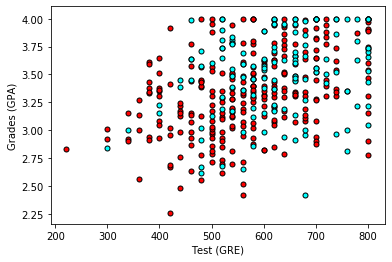

In [84]:
# Function to help us plot
def plot_points(data):
    X = np.array(data[["gre","gpa"]])
    y = np.array(data["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')
    
# Plotting the points
plot_points(admissions)
plt.show()

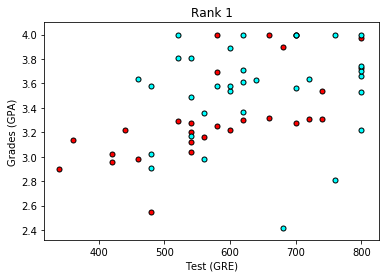

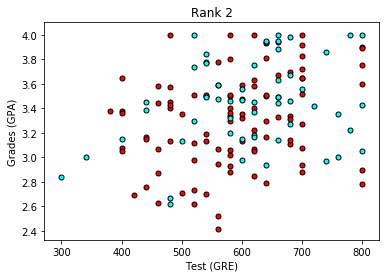

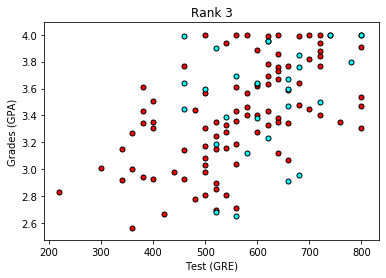

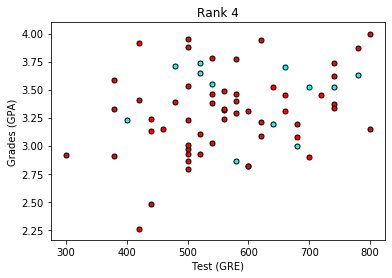

In [86]:
# Separating the ranks
data_rank1 = admissions[admissions["rank"]==1]
data_rank2 = admissions[admissions["rank"]==2]
data_rank3 = admissions[admissions["rank"]==3]
data_rank4 = admissions[admissions["rank"]==4]

# Plotting the graphs
plot_points(data_rank1)
plt.title("Rank 1")
plt.show()
plot_points(data_rank2)
plt.title("Rank 2")
plt.show()
plot_points(data_rank3)
plt.title("Rank 3")
plt.show()
plot_points(data_rank4)
plt.title("Rank 4")
plt.show()

lower the rank, the higher the acceptance rate

In [88]:
one_hot_data = pd.concat([admissions, pd.get_dummies(admissions['rank'], prefix='rank')], axis=1)
#drop previous rank column
one_hot_data = one_hot_data.drop('rank', axis=1)
#check out df
one_hot_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1
5,1,760,3.00,0,1,0,0
6,1,560,2.98,1,0,0,0
7,0,400,3.08,0,1,0,0
8,1,540,3.39,0,0,1,0
9,0,700,3.92,0,1,0,0


In [89]:
#scale data as grades is 1-4 and test scores is 200-800
#make copy of data
processed_data = one_hot_data[:]
#scale columns
processed_data['gre_scaled'] = one_hot_data['gre']/800 
processed_data['gpa_scaled'] = one_hot_data['gpa']/4
processed_data[:10]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4,gre_scaled,gpa_scaled
0,0,380,3.61,0,0,1,0,0.475,0.9025
1,1,660,3.67,0,0,1,0,0.825,0.9175
2,1,800,4.00,1,0,0,0,1.000,1.0000
3,1,640,3.19,0,0,0,1,0.800,0.7975
4,0,520,2.93,0,0,0,1,0.650,0.7325
5,1,760,3.00,0,1,0,0,0.950,0.7500
6,1,560,2.98,1,0,0,0,0.700,0.7450
7,0,400,3.08,0,1,0,0,0.500,0.7700
8,1,540,3.39,0,0,1,0,0.675,0.8475
9,0,700,3.92,0,1,0,0,0.875,0.9800


In [91]:
#split to training and test dataset
from sklearn.model_selection import train_test_split
X = processed_data.drop(["admit", "gre", "gpa"], axis =1)
y = processed_data["admit"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print("Number of training samples is", len(X_train))
print("Number of testing samples is", len(X_test))

Number of training samples is 360
Number of testing samples is 40


In [149]:
# train 2 -layer neural network
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_prime(x):
    return sigmoid(x) * (1-sigmoid(x))
def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

def error_term_formula(x, y, output):
    return (y - output)*sigmoid_prime(x)

epochs = 2000
learnrate = 0.3
eList = []
LossLst = []
testList = []
# Training function
def train_nn(features, targets, epochs, learnrate):
    
    # Use to same seed to make debugging easier
    np.random.seed(42)

    n_records, n_features = features.shape
    last_loss = None

    # Initialize weights
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features.values, targets):
            # Loop through all records, x is the input, y is the target

            # Activation of the output unit
            #   Notice we multiply the inputs and the weights here 
            #   rather than storing h as a separate variable 
            output = sigmoid(np.dot(x, weights))

            # The error, the target minus the network output
            error = error_formula(y, output)

            # The error term
            error_term = error_term_formula(x, y, output)

            # The gradient descent step, the error times the gradient times the inputs
            del_w += error_term * x

        # Update the weights here. The learning rate times the 
        # change in weights, divided by the number of records to average
        weights += learnrate * del_w / n_records

        # Printing out the mean square error on the training set
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean((out - targets) ** 2)
            print("Epoch:", e)
            eList.append(e)
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            LossLst.append(loss)        
            test_out = sigmoid(np.dot(X_test, weights))
            predictions = test_out > 0.5
            accuracy = np.mean(predictions == y_test)
            print("Prediction accuracy: {:.3f}".format(accuracy))
            testList.append(accuracy)
            print("=========")
    print("Finished training!")
    return weights
    
weights = train_nn(X_train, y_train, epochs, learnrate)

Epoch: 0
Train loss:  0.2643870341806699
Prediction accuracy: 0.475
Epoch: 200
Train loss:  0.21302167632086233
Prediction accuracy: 0.650
Epoch: 400
Train loss:  0.20718418571146663
Prediction accuracy: 0.650
Epoch: 600
Train loss:  0.20496944187051142
Prediction accuracy: 0.625
Epoch: 800
Train loss:  0.20400134091211083
Prediction accuracy: 0.650
Epoch: 1000
Train loss:  0.20351263825012839
Prediction accuracy: 0.650
Epoch: 1200
Train loss:  0.20322343379056004
Prediction accuracy: 0.650
Epoch: 1400
Train loss:  0.20302239386943483
Prediction accuracy: 0.650
Epoch: 1600
Train loss:  0.2028625282735953
Prediction accuracy: 0.650
Epoch: 1800
Train loss:  0.20272312763043204
Prediction accuracy: 0.650
Finished training!


In [95]:
# check on test data

test_out = sigmoid(np.dot(X_test, weights))
predictions = test_out > 0.5
accuracy = np.mean(predictions == y_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Prediction accuracy: 0.650


if nothing works 
 - architecture is poor
 - data is noisy

In [ ]:
#Model complexity graph

# check for over and under fitting if plot training testing error curves
# y-axis error
# x-axis


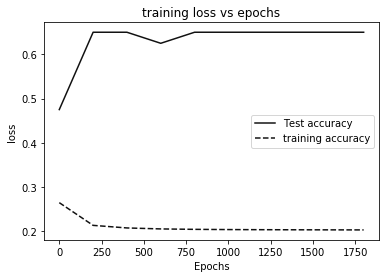

In [150]:
# Draw lines
plt.plot(eList, testList, color="#111111",  label="Test accuracy")
plt.plot(eList, LossLst, '--', color="#111111",  label="training loss")
plt.title('training loss vs epochs')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc="best")

In [102]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(Perceptron(alpha = 0.01, max_iter = 1000, random_state = 0), X, y, train_sizes = [50,80,110], cv = 5)

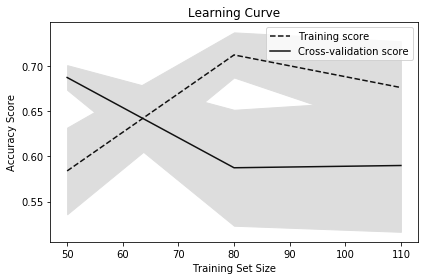

In [103]:
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

used to identify early stopping point.

## Overfitting regularization

L1 is good for feature selection as the results are usually sparse of 1's and 0's. Small weights tend to go to zero and reduces the features

L2 is better for training models as returns less sparse weights.

## Overfitting dropout

to stop some parts of the network which have large weights dominating the network. This can stop small weights having any impact. 

Solution is to randomly turn off some nodes during training

## Vanishing gradient

when using sigmoid function, if point is near extremes the gradient is near 0 and therefore it takes a long time to converge.

Solution is to use rectified linear function - relu:
 - if you're positive but if you are negative it will be 0
 - derivative is 1 is if the number is positive
 
Final unit is still a sigmoid as we want probabilities between 0 and 1. If we had the final unit as a relu function, it can be used as regression (often used in RNN).

stochastic gradient:
    - small subset of data is run through network and back propagated. Less accurate steps but moves quicker than than full dataset 
    
Momentum:
    - step in direction of average of last X steps.
    - can make most recent steps heavier weighted
    - controlled by defining beta.